In [3]:
from IPython.core.display import HTML

def css_styling():
    styles = open("styles/workshop.css", "r").read()
    return HTML(styles)
css_styling()

<div class="alert alert-warning">
<h2>Goals</h2>
</div>

* Use a library function to get a lsit of filenames that match a simple wildcard pattern.
* Use a for loop to process multiple files.

We now have almost everything we need to process all our data files. The only thing that’s missing is a library with a rather unpleasant name:

In [4]:
import glob

The glob library contains a single function, also called glob, that finds files whose names match a pattern. We provide those patterns as strings: the character * matches zero or more characters, while ? matches any one character. We can use this to get the names of all the html files:

In [6]:
print glob.glob('*.ipynb')

['0 - Introduction.ipynb', '1 - Analyzing Patient Data.ipynb', '2 - Getting lazy with loops.ipynb', '3 - Loving the Lists.ipynb', '4 - Dancing with dictionaries.ipynb', '5 - Choices with conditionals.ipynb', '6 - Wrangling multiple files.ipynb']


As these examples show, glob.glob’s result is a list of strings, which means we can loop over it to do something with each filename in turn. In our case, the “something” we want to do is generate a set of plots for each file in our inflammation dataset. Let’s test it by analyzing the first three files in the list:

data/inflammation-01.csv


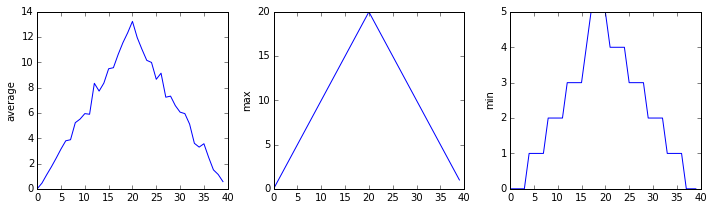

data/inflammation-02.csv


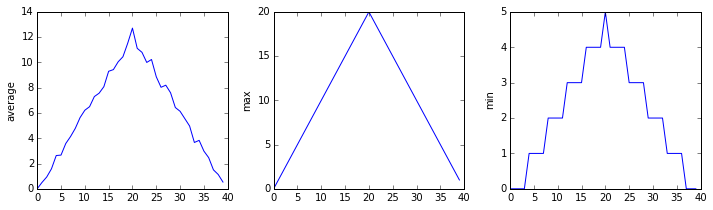

data/inflammation-03.csv


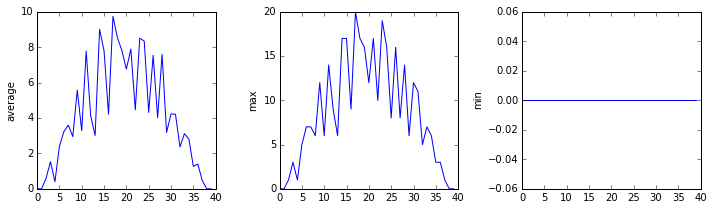

In [2]:
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt

filenames = glob.glob('data/*.csv')
filenames = filenames[0:3]
for f in filenames:
    print f

    data = np.loadtxt(fname=f, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(data.mean(axis=0))

    axes2.set_ylabel('max')
    axes2.plot(data.max(axis=0))

    axes3.set_ylabel('min')
    axes3.plot(data.min(axis=0))

    fig.tight_layout()
    plt.show(fig)

Sure enough, the maxima of the first two data sets show exactly the same ramp as the first, and their minima show the same staircase structure; a different situation has been revealed in the third dataset, where the maxima are a bit less regular, but the minima are consistently zero.

<div class="alert alert-info"> A few notes about this code.  You may have noticed, if you run all the cells, that glob is imported twice.  While well-written code will usually import a library only once in each file, there is no danger from accidentally importing more than once.  Also, you may have noticed that the import of numpy was written as ```import numpy as np```.  This is a convenience that Python offers to lazy typists (which describes programmers and scientists alike).  When you import the library using ```as```, you can refer to it using the shortened name ```np``` instead of the fullname ```numpy```.  This is quite common and you will see it often in code you find online.
</div>